<a href="https://colab.research.google.com/github/KimJunGu9/6.DL/blob/main/14_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 로지스틱 회귀(Logistic Regression)

* 둘 중에 하나를 결정하는 문제를 이진분류(Binary Classification)라고 함
* 이진 분류를 풀기 위한 대표적인 알고리즘

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # [몇시간 공부, 몇시간 과외]
y_train = [[0], [0], [0], [1], [1], [1]] # 0 : 불합격 , 1 : 합격

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2, 1), requires_grad=True) # W : 기울기 값
b = torch.zeros((1), requires_grad=True)

### 1-1. 시그모이드 함수(Sigmoid Function)
* S자 모양의 함수로 로지스틱 함수, 오차 함수, 정규분포의 cdf, 역 탄젠트 함수등 다양한 함수에서 사용
* 0 ~ 1사이의 값을 갖음
* 하나의 변곡점을 가지며 모든 점에서 음이 아닌 미분 값을 갖음
* 시그모이드 함수는 미분이 가능하므로 미분 불가능한 단위 계단 함수 대신 사용이 가능

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # 범위 : -5.0 부터 5.0 까지
y = sigmoid(x) # 그래프

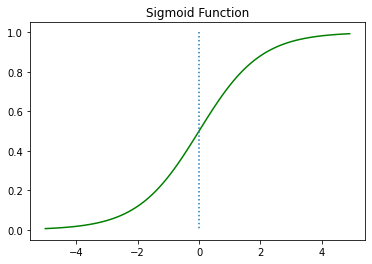

In [ ]:
plt.plot(x, y, 'g') # 초록색으로 그어줌
plt.plot([0,0], [1.0, 0.0], ':') # : : 가운데에 : 점을 찍어줌
plt.title('Sigmoid Function')
plt.show()

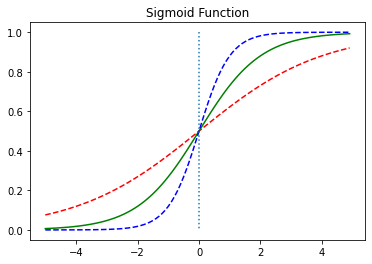

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')

plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [ ]:
H = torch.sigmoid(x_train.matmul(W) + b) # matmul : 행끼리 곱한다.
print(H)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


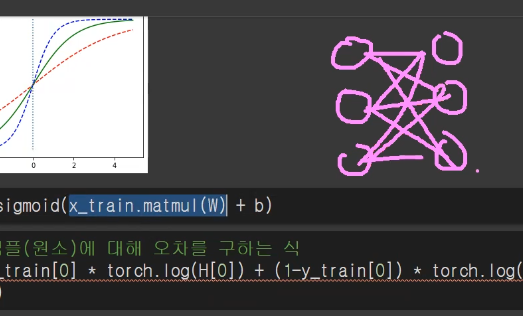

In [ ]:
# 하나의 샘플(원소)에 대해 오차를 구하는 식
# 시그모이드 값에서 실제값하고 오차를 구하는 식
loss = -(y_train[0] * torch.log(H[0]) + (1-y_train[0]) * torch.log(1-H[0]))
print(loss)

tensor([0.6931], grad_fn=<NegBackward0>)


In [ ]:
# 모든 샘플(원소)에 대해 오차를 구하는 식
loss = -(y_train * torch.log(H) + (1-y_train) * torch.log(1-H))
print(loss)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
# 평균값
cost = loss.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
# torch.nn.functional 에 loss값을 구해주는 함수가 있다.

F.binary_cross_entropy(H, y_train) # loss값을 구해주는 함수.    binary : 이진



# 위와 아래 코드는 같다,
# loss = -(y_train * torch.log(H) + (1-y_train) * torch.log(1-H))  ==  F.binary_cross_entropy(H, y_train)
# 둘이 같다. 길게 쏼라쏼라 쓰는 경우가 많이 없다.

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

### 1-2. 분류 모델 만들기

In [ ]:
x_train = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_train = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

W = torch.zeros((2, 1), requires_grad=True) # 가중치
b = torch.zeros((1), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

epoch_count = 1000

for epoch in range(1, epoch_count + 1):
    H = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost:{:6f}'.format(epoch, epoch_count, cost.item()))

Epoch  100/1000 Cost:0.578609
Epoch  200/1000 Cost:0.535559
Epoch  300/1000 Cost:0.505897
Epoch  400/1000 Cost:0.484212
Epoch  500/1000 Cost:0.467438
Epoch  600/1000 Cost:0.453799
Epoch  700/1000 Cost:0.442235
Epoch  800/1000 Cost:0.432093
Epoch  900/1000 Cost:0.422962
Epoch 1000/1000 Cost:0.414571


In [ ]:
# x_train값을 집어넣어서 기울기랑 절편값을 계산해서 H값을 뽑아냄
H = torch.sigmoid(x_train.matmul(W) + b)
print(H)

tensor([[0.2170],
        [0.2645],
        [0.6868],
        [0.6295],
        [0.7869],
        [0.9308]], grad_fn=<SigmoidBackward0>)


In [ ]:
pred = H >= torch.FloatTensor([0.5]) # 판단하기 나름
print(pred)

tensor([[False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W, b)

tensor([[ 0.7763],
        [-0.5157]], requires_grad=True) tensor([-1.0282], requires_grad=True)


### 1-3. nn.Module로 구현하기

In [ ]:
x_train = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_train = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

# nn.Sequential(): nn.Module 레이어를 차례로 쌓을 수 있도록 함. 딥러닝에서 심플한 모델을 작성할 때 사용
model = nn.Sequential(
    nn.Linear(2, 1), # 입력은 2개씩, 출력은 1개
    nn.Sigmoid() # 들어가는 값이 시그모이드로 들어가게한다.
)

In [ ]:
model(x_train)

tensor([[0.6111],
        [0.7546],
        [0.7008],
        [0.8626],
        [0.8997],
        [0.9034]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(model)  # in_features=2, out_features=1, bias=True
              # 시그모이드가 한개 추가

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)


In [ ]:
epoch_count = 1000

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1, epoch_count + 1):
    H = model(x_train)
    cost = F.binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        pred = H >= torch.FloatTensor([0.5]) # pred에서 True인지 False인지 나온다.
        cr_pred = pred.float() == y_train  # 예측값(pred)을 float형으로 바꾸고 y_train(결과값)과 비교해서 True인지 False인지 나온다.
        accuracy = cr_pred.sum().item() / len(cr_pred)
        print('Epoch {:4d}/{} Cost:{:6f} Accuracy:{:2.2f}%'.format(epoch, epoch_count, cost.item(), accuracy*100))

Epoch   10/1000 Cost:0.609628 Accuracy:50.00%
Epoch   20/1000 Cost:0.580476 Accuracy:50.00%
Epoch   30/1000 Cost:0.562851 Accuracy:50.00%
Epoch   40/1000 Cost:0.551464 Accuracy:66.67%
Epoch   50/1000 Cost:0.543233 Accuracy:66.67%
Epoch   60/1000 Cost:0.536576 Accuracy:66.67%
Epoch   70/1000 Cost:0.530743 Accuracy:66.67%
Epoch   80/1000 Cost:0.525392 Accuracy:66.67%
Epoch   90/1000 Cost:0.520368 Accuracy:66.67%
Epoch  100/1000 Cost:0.515598 Accuracy:66.67%
Epoch  110/1000 Cost:0.511045 Accuracy:66.67%
Epoch  120/1000 Cost:0.506688 Accuracy:66.67%
Epoch  130/1000 Cost:0.502512 Accuracy:66.67%
Epoch  140/1000 Cost:0.498505 Accuracy:83.33%
Epoch  150/1000 Cost:0.494658 Accuracy:83.33%
Epoch  160/1000 Cost:0.490962 Accuracy:83.33%
Epoch  170/1000 Cost:0.487410 Accuracy:83.33%
Epoch  180/1000 Cost:0.483992 Accuracy:83.33%
Epoch  190/1000 Cost:0.480703 Accuracy:83.33%
Epoch  200/1000 Cost:0.477536 Accuracy:83.33%
Epoch  210/1000 Cost:0.474484 Accuracy:83.33%
Epoch  220/1000 Cost:0.471542 Accu

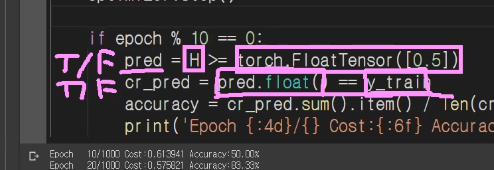

In [ ]:
model(x_train)

tensor([[0.1871],
        [0.2649],
        [0.6318],
        [0.6496],
        [0.8079],
        [0.9325]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.8190, -0.3708]], requires_grad=True), Parameter containing:
tensor([-1.5463], requires_grad=True)]


### 1-4. 클래스로 모델 구현하기

In [ ]:
class BinaryClassifier(nn.Module): # 항상 nn.Module을 상속을 받을 것
    def __init__(self): # 생성자가 있어야 됨
        super().__init__() # 생성자 안에 부모를 호출하는 것이 있어야 함
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [ ]:
x_train = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_train = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

In [ ]:
model = BinaryClassifier()

In [ ]:
epoch_count = 1000

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1, epoch_count + 1):
    H = model(x_train)
    cost = F.binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        pred = H >= torch.FloatTensor([0.5])
        cr_pred = pred.float() == y_train
        accuracy = cr_pred.sum().item() / len(cr_pred)
        print('Epoch {:4d}/{} Cost:{:6f} Accuracy:{:2.2f}%'.format(epoch, epoch_count, cost.item(), accuracy*100))

Epoch   10/1000 Cost:1.061452 Accuracy:50.00%
Epoch   20/1000 Cost:0.784859 Accuracy:50.00%
Epoch   30/1000 Cost:0.673941 Accuracy:50.00%
Epoch   40/1000 Cost:0.632022 Accuracy:83.33%
Epoch   50/1000 Cost:0.613939 Accuracy:83.33%
Epoch   60/1000 Cost:0.604177 Accuracy:83.33%
Epoch   70/1000 Cost:0.597524 Accuracy:83.33%
Epoch   80/1000 Cost:0.592149 Accuracy:83.33%
Epoch   90/1000 Cost:0.587374 Accuracy:83.33%
Epoch  100/1000 Cost:0.582937 Accuracy:83.33%
Epoch  110/1000 Cost:0.578730 Accuracy:83.33%
Epoch  120/1000 Cost:0.574705 Accuracy:83.33%
Epoch  130/1000 Cost:0.570839 Accuracy:83.33%
Epoch  140/1000 Cost:0.567118 Accuracy:83.33%
Epoch  150/1000 Cost:0.563531 Accuracy:83.33%
Epoch  160/1000 Cost:0.560072 Accuracy:83.33%
Epoch  170/1000 Cost:0.556733 Accuracy:83.33%
Epoch  180/1000 Cost:0.553508 Accuracy:83.33%
Epoch  190/1000 Cost:0.550391 Accuracy:83.33%
Epoch  200/1000 Cost:0.547376 Accuracy:83.33%
Epoch  210/1000 Cost:0.544460 Accuracy:83.33%
Epoch  220/1000 Cost:0.541636 Accu

In [ ]:
val = torch.FloatTensor([2, 2])
pred = model(val)
print('학습 후 입력이 2, 2일 때 합격여부: ', pred)

학습 후 입력이 2, 2일 때 합격여부:  tensor([0.3878], grad_fn=<SigmoidBackward0>)


In [ ]:
val = torch.FloatTensor([5, 4])
pred = model(val)
print('학습 후 입력이 5, 4일 때 합격여부: ', pred)

학습 후 입력이 5, 4일 때 합격여부:  tensor([0.6593], grad_fn=<SigmoidBackward0>)


In [ ]:
val = torch.FloatTensor([3, 1])
pred = model(val)
print('학습 후 입력이 3, 1일 때 합격여부: ', pred)

학습 후 입력이 3, 1일 때 합격여부:  tensor([0.7140], grad_fn=<SigmoidBackward0>)
